In [43]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [6]:
# read the csv file
data = pd.read_csv('banknote.csv')


In [5]:
# describe the size of the dataset
data.size

2744

In [7]:
# columns
data.columns

Index(['V1', 'V2'], dtype='object')

In [9]:
# get the data types
data.dtypes

V1    float64
V2    float64
dtype: object

In [11]:
# get the means
data_mean = data.mean()
data_mean

V1    0.433735
V2    1.922353
dtype: float64

In [12]:
# get standard deviations
data_std = data.std()
data_std

V1    2.842763
V2    5.869047
dtype: float64

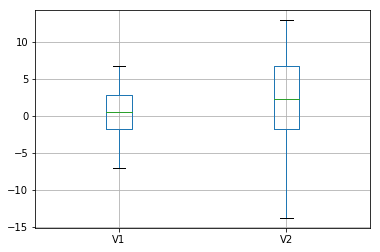

In [14]:
# make a boxplot from DataFrame columns
boxplot = data.boxplot(column=['V1', 'V2'])
boxplot

graphically depicting groups of numerical data through their quartiles
- the box extends from the Q1 to Q4 quartile values of the data
- a line at the median Q2
- the whiskers extend from the edge of the box show the range of the data
- by default, they extend no more than 1.5 * IQR (IQR = Q3 -Q1) from the edges of the box
- ending at the farthest data point within that interval
- outliers are plotted as separate dots.

In [15]:
# pandas .describe() generate summary statistics
# this is a quick way to help determine whether or not the dataset
# has outliers
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


the mean is sensitive to outlier
- if the mean is small compared to the max indicates the max is an outlier

for V1:
- max = 6,8248
- mean = 0.43373

for V2:
- max = 12.951
- mean = 1.9223

In [23]:
# pandas quantile() 
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print(q1)
print(q3)

V1   -1.7730
V2   -1.7082
Name: 0.25, dtype: float64
V1    2.821475
V2    6.814625
Name: 0.75, dtype: float64


## finding outliers using statistical methods

The outlier data points are the ones falling below Q1-1.5 IR or above Q3 + 1.5 IQR
- create a function that takes the column from the df and outputs the outliers

In [24]:
# make a function to find outliers
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    # find the outliers in the data frame
    outliers = df[ ( (df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)) ) ]
    return outliers

In [28]:
# print outliers
outliers = find_outliers_IQR(data)
outliers.dropna()

,V1,V2


The above function proves that there is no outliers in this dataset

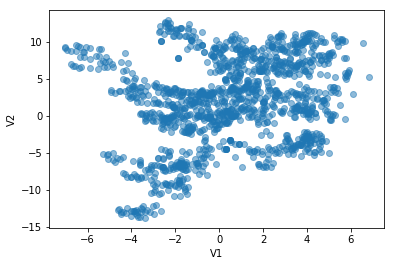

In [41]:
# visualise the data without normalisation
plt.scatter(data['V1'], data['V2'], alpha=0.5)
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

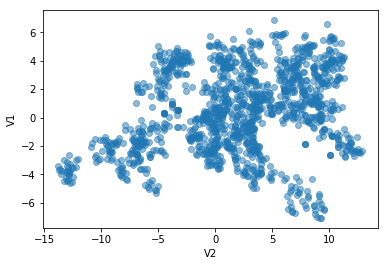

In [40]:
plt.scatter(data['V2'], data['V1'], alpha=0.5)
plt.xlabel('V2')
plt.ylabel('V1')
plt.show()

In [36]:
# normalise data
normed_data = data.copy()
normed_data = (normed_data - normed_data.min()) / (normed_data.max() - normed_data.min())
normed_data.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


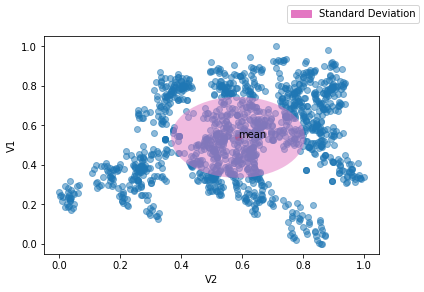

In [105]:
# plot normalised data 
mean_coor = [normed_data.V2.mean(), normed_data.V1.mean()]
V2_std = normed_data.V2.std()
V1_std = normed_data.V1.std()

ellipse = patches.Ellipse(
    mean_coor, 
    V2_std*2, 
    V1_std*2,
    alpha=0.5,
    facecolor="tab:pink"
)

fig, graph = plt.subplots()

graph.scatter(normed_data.V2.mean(), normed_data.V1.mean(), c='r')
plt.text(x=normed_data.V2.mean(), y=normed_data.V1.mean(), s='mean')

std_dev = patches.Patch(color="tab:pink", label='Standard Deviation')
graph.scatter(normed_data['V2'], normed_data['V1'], alpha=0.5)
graph.add_patch(ellipse)
fig.legend(handles=[std_dev])

plt.xlabel('V2')
plt.ylabel('V1')

plt.show()

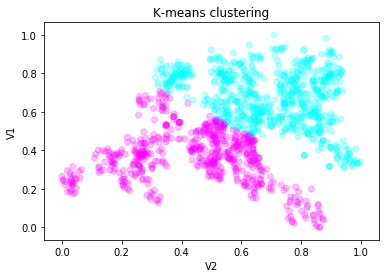

In [99]:
# apply k-means clustering to this data
# convert the dataframe into numpy
numpy_data = np.column_stack((normed_data.V2, normed_data.V1))
# create the k_means analysis
km_res = KMeans(n_clusters=2).fit(numpy_data)
# find the clusters coordinates
clusters = km_res.cluster_centers_

# map which data point belong to which clusters
cluster_groups = km_res.predict(numpy_data)

# plot
plt.scatter(normed_data['V2'], normed_data['V1'],
            c=cluster_groups, cmap='cool', alpha=0.25)

'''
plt.scatter(clusters[:,0], clusters[:,1], alpha=0.7,
            s=1000*2, c=np.arange(len(clusters[:,0])), cmap="coolwarm")
            '''

plt.xlabel('V2')
plt.ylabel('V1')
plt.title('K-means clustering')


plt.show()

k means is sensitive to outliers as the algorithm itself is based on means
- this dataset does not have outliers, so it is suitable

limitations
- sensitve to outliers
    - treats all data points equally
    - outliers can distort the clustering processs, causing the algorithm to create less reliable clusters.
- dependency on initial guess
- assumption of round clusters
    - k-means assumes that clusters are round or spherical in shape and have roughly the same sizes
    - may struggle to handle such irregular clusters, resulting in less accurate clusters
    - algorithms like DBSCAN or Guassian Mixture models can handle more complex cluster shapes.
- need to know the number of clusters
    - have to tell the algo how many clusters we expect in the data
    - tricky if we don't have prior knowledge about the data
    - wrong number of clusters can lead to misleading results
- handling large datasets
    - become computationally expensive and slow

In [90]:
# try gmm
from sklearn.mixture import GaussianMixture as gm

classifier = gm(n_components=2)
classifier.fit(normed_data)

# assign a cluster to each datapoint
gmm_cluster_groups = classifier.predict(normed_data)

#gmm mean
gmm_mean = classifier.means_

### try Gaussian Mixture model
- try to fit several Gaussian likelihood to the data

covariance types:
- full: each component has its own general covariance matrix
- tied: all components share the same general covariance matrix
- diag: each component has its own diagonal covariance matrix
- spherical: each component has its own singl

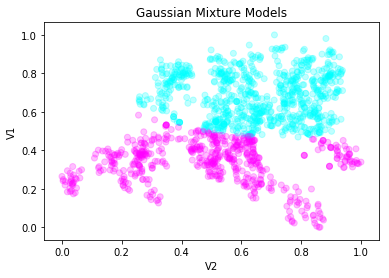

In [100]:
plt.scatter(normed_data['V2'], normed_data['V1'],
            c=gmm_cluster_groups, cmap='cool_r', alpha=0.25)
'''
plt.scatter(gmm_mean[:,0], gmm_mean[:,1], alpha=0.7,
            s=1000, c=np.arange(len(gmm_mean[:,0])), cmap="coolwarm")
            '''

plt.xlabel('V2')
plt.ylabel('V1')
plt.title('Gaussian Mixture Models')


plt.show()

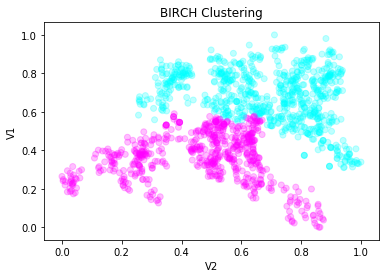

In [96]:
# test BIRCH model
from sklearn.cluster import Birch

birch_model = Birch(threshold=0.01, n_clusters=2)
birch_model.fit(normed_data)
birch_cluster_groups = birch_model.predict(normed_data)

plt.scatter(normed_data['V2'], normed_data['V1'],
            c=birch_cluster_groups, cmap='cool', alpha=0.25)
'''
plt.scatter(gmm_mean[:,0], gmm_mean[:,1], alpha=0.7,
            s=1000, c=np.arange(len(gmm_mean[:,0])), cmap="coolwarm")
            '''

plt.xlabel('V2')
plt.ylabel('V1')
plt.title('BIRCH Clustering')


plt.show()

the description is informative and relies on statistical measures.

the evaluation of the suitability is based on the characteristics of the dataset.

the type of data best suited for K-Means clustering would be numerical data with a relatively lower number of dimensions


- The first figure give an overall description of the dataset:
    - There is an overall 1372 rows for each 2 columns
    - at least ten times the number of clustering variables multiplied by the number of clusters
    - The values are stored as float
    - the type of data best suited for K-means clustering would be numerical data with a relatively lower number of dimenstions
    - A study by Dolnicar et al. recommended at least 70 times the number of variables
    - the curse of dimensionality:
        - as the dimensions increase, the volume of space increases exponenttially.
        - data becomes sparse. need more points to fill the space 
        - increasing dimensions increases the complexity of the data without necessarily increasing the amount of useful information.
    
- detecting outliers:
    - K-means clustering is sensitve to outliers, as it treats all data points equally
    - outliers can distort the clustering processs, causing the algorithm to create less reliable clusters.
    - In figure 2, the boxplot is used to graphically depicting groups of numerical data through their quartiles
    - the box extends from the Q1 to Q4 quartile values of the data
    - the whiskers extend from the edge of the box show the range of the data
    - by default, they extend no more than 1.5 * IQR (IQR = Q3 -Q1) from the edges of the box, ending at the farthest data point within that interval
    - Any outliers in the dataset are plotted as separate dots.
    - Thus, the boxplot shows that there is no outlier in the dataset.
    
- Normalisation:
    - K-means clustering is based on the Eulidean distance between data points
    - data features with larger values or ranges will have more influence on the clustering results than features with smaller values or ranges.
    - Normalising the data will convert the values on similar scales, this allows all features to contribute equally
    